<a href="https://colab.research.google.com/github/SefiyeArican/Ocular-Disease-Recognition/blob/main/Fundus_Image_Processing_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPROCESSING**

**Access to the dataset via google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/fundus.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

**Data loading and review**

In [49]:
import os
from PIL import Image

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

testing_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images'
print(f"Number of images in the Testing folder: {count_images_in_directory(testing_dir)}")
training_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Training Images'
print(f"Number of images in the Training folder: {count_images_in_directory(training_dir)}")

Number of images in the Testing folder: 1000
Number of images in the Training folder: 7000


**What is the type of these images in the dataset?**

In [50]:

import os
from collections import defaultdict

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_image_types(data_dir):
    # Create a dictionary of image types and numbers
    image_types = defaultdict(int)

    # Navigate files in folders and subfolders
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # Get file extension
            ext = os.path.splitext(file)[1].lower()
            if ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']:
                image_types[ext] += 1

    return image_types

print("Types of images in Testing folder:")
testing_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images'
image_types_counts = count_image_types(testing_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


print("Types of images in Training folder:")
training_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Training Images'
image_types_counts = count_image_types(training_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


Types of images in Testing folder:
.jpg: 1000 images
Types of images in Training folder:
.jpg: 7000 images


All images type is .jpg

**Visualization of the sample image**

This step allows us to learn about the dataset by selecting a random image from the dataset.

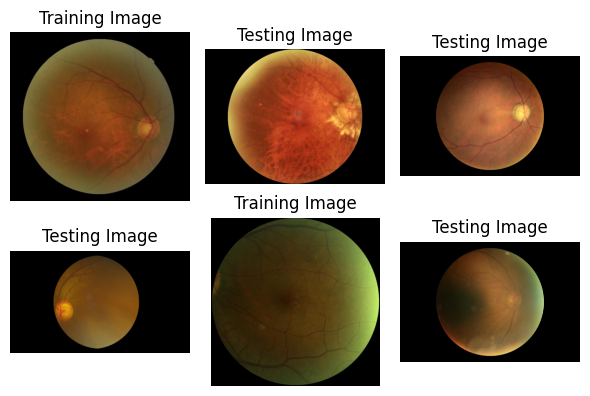

In [51]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

class_test = os.path.join(data_dir, 'Testing Images')
class_train = os.path.join(data_dir, 'Training Images')

# 6 farklı rastgele görüntü göstermek için
num_images_to_show = 6

plt.figure(figsize=(6, 4))

for i in range(num_images_to_show):
    # "train" veya "test" klasörlerinden rastgele birini seç
    selected_folder = random.choice([class_test, class_train])

    # Seçilen klasörden rastgele bir görüntü seç
    sample_image_path = os.path.join(selected_folder, random.choice(os.listdir(selected_folder)))

    # Görüntüyü oku
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Görüntüyü alt plota ekle
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
    folder_name = 'Testing' if selected_folder == class_test else 'Training'
    plt.title(f"{folder_name} Image")

plt.tight_layout()
plt.show()


The images are not all the same size and background cleaning is required.

**Reviewing CSV File**

In [52]:
import pandas as pd
df = pd.read_csv('/content/odir-5k/full_df.csv')
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

* There's no null values in the data.
* Half of the columns (10 columns) contain integer values, while the other half (9 columns) contain text values.

**Mapping images in the dataset to image paths in the csv file**

In [56]:
import pandas as pd
import os
import cv2

# Uploading CSV file
csv_path = '/content/odir-5k/full_df.csv'
df = pd.read_csv(csv_path)

# Image path column
image_path_column = 'filename'
image_paths = df[image_path_column]

# Home directory with image files
data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

# Testing and Training directories
testing_dir = os.path.join(data_dir, 'Testing Images')
training_dir = os.path.join(data_dir, 'Training Images')

# Loading and matching image files
success = True
for image_path in image_paths:
    full_image_path_1 = os.path.join(testing_dir, image_path)
    full_image_path_2 = os.path.join(training_dir, image_path)

    if os.path.exists(full_image_path_1):
        pass # print(f"Processing {full_image_path_1}")
    elif os.path.exists(full_image_path_2):
        pass #print(f"Processing {full_image_path_2}")
    else:
        print(f"Image not found: {full_image_path_1} or {full_image_path_2}")
        success = False

if success:
    print("Process completed successfully.")

Process completed successfully.


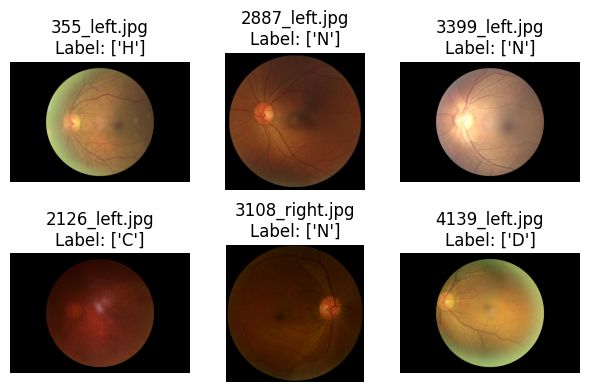

In [57]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import cv2

csv_path = '/content/odir-5k/full_df.csv'
df = pd.read_csv(csv_path)

# Image path column
image_path_column = 'filename'
label_column = 'labels'
image_paths = df[image_path_column]
labels = df[label_column]

# Home directory with image files
data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

# Testing ve Training directories
testing_dir = os.path.join(data_dir, 'Testing Images')
training_dir = os.path.join(data_dir, 'Training Images')

# Randomly select 6 images
random_indices = random.sample(range(len(image_paths)), 6)
random_images = image_paths[random_indices]
random_labels = labels[random_indices]

# Upload and visualize images
fig, axes = plt.subplots(2, 3, figsize=(6, 4))
axes = axes.flatten()

for ax, image_path, label in zip(axes, random_images, random_labels):
    full_image_path_1 = os.path.join(testing_dir, image_path)
    full_image_path_2 = os.path.join(training_dir, image_path)

    if os.path.exists(full_image_path_1):
        image = cv2.imread(full_image_path_1)
    elif os.path.exists(full_image_path_2):
        image = cv2.imread(full_image_path_2)
    else:
        image = None

    if image is not None:
        # BGR to RGB conversion
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.set_title(f"{image_path}\nLabel: {label}")
    else:
        ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')

    ax.axis('off')

plt.tight_layout()
plt.show()

**Labels column distribution (Disease distribution in the data set)**

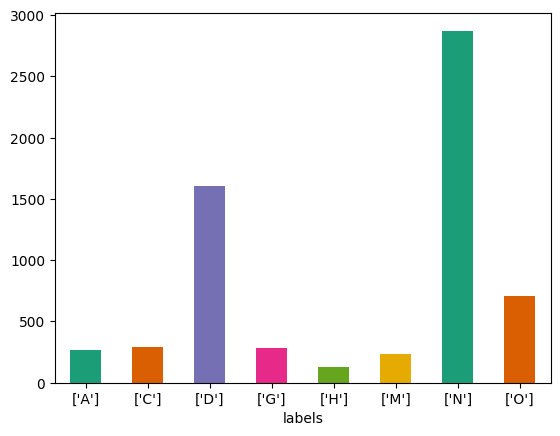

In [58]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('labels').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.xticks(rotation=0)
plt.show()

I noticed that most of the images in our dataset were healthy, with diabetes being the most common disease and hypertension the least common.

In this project, i will focus on disease prediction from fundus images. In this csv file we do not need the 'filepath' and 'target' columns. Instead of deleting these columns, we can continue processing the xlsx file.

**Reviewing XLSX File**

In [59]:
from pandas import read_excel
from tabulate import tabulate

my_sheet = 'Sheet1'
file_name = '/content/odir-5k/ODIR-5K/ODIR-5K/data.xlsx'
df = read_excel(file_name, sheet_name=my_sheet)

print(tabulate(df.head(), headers='keys', tablefmt='pretty')) # Print DataFrame in regular format using tabulate

+---+----+-------------+-------------+-------------+--------------+----------------------------------------------------+----------------------------------------+---+---+---+---+---+---+---+---+
|   | ID | Patient Age | Patient Sex | Left-Fundus | Right-Fundus |              Left-Diagnostic Keywords              |       Right-Diagnostic Keywords        | N | D | G | C | A | H | M | O |
+---+----+-------------+-------------+-------------+--------------+----------------------------------------------------+----------------------------------------+---+---+---+---+---+---+---+---+
| 0 | 0  |     69      |   Female    | 0_left.jpg  | 0_right.jpg  |                      cataract                      |             normal fundus              | 0 | 0 | 0 | 1 | 0 | 0 | 0 | 0 |
| 1 | 1  |     57      |    Male     | 1_left.jpg  | 1_right.jpg  |                   normal fundus                    |             normal fundus              | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 2 | 2  |     42      |    Ma

**Mapping images in the dataset to image paths in the xlsx file**

In [63]:
import pandas as pd
import os
import cv2

# Load the Excel file
my_sheet = 'Sheet1'
file_name = '/content/odir-5k/ODIR-5K/ODIR-5K/data.xlsx'
df = pd.read_excel(file_name, sheet_name=my_sheet)

# Image path columns
left_fundus_column = 'Left-Fundus'
right_fundus_column = 'Right-Fundus'

# Home directory with image files
data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

# Testing and Training directories
testing_dir = os.path.join(data_dir, 'Testing Images')
training_dir = os.path.join(data_dir, 'Training Images')

# Function to process images
def process_image(image_path):
    full_image_path_1 = os.path.join(testing_dir, image_path)
    full_image_path_2 = os.path.join(training_dir, image_path)

    if os.path.exists(full_image_path_1):
        pass # print(f"Processing {full_image_path_1}")
    elif os.path.exists(full_image_path_2):
        pass # print(f"Processing {full_image_path_2}")
    else:
        print(f"Image not found: {full_image_path_1} or {full_image_path_2}")
        success = False

if success:
    print("Process completed successfully.")

# Iterate over the rows and process images
for index, row in df.iterrows():
    left_image_path = row.get(left_fundus_column)
    right_image_path = row.get(right_fundus_column)

    if pd.notna(left_image_path):
        process_image(left_image_path) # checks whether the values in a data frame or series are null

    if pd.notna(right_image_path):
        process_image(right_image_path)

Process completed successfully.


In [61]:
# For error '(FULLWIDTH COMMA - full-width comma)'
import warnings
warnings.filterwarnings("ignore", message="Glyph .* missing from current font")

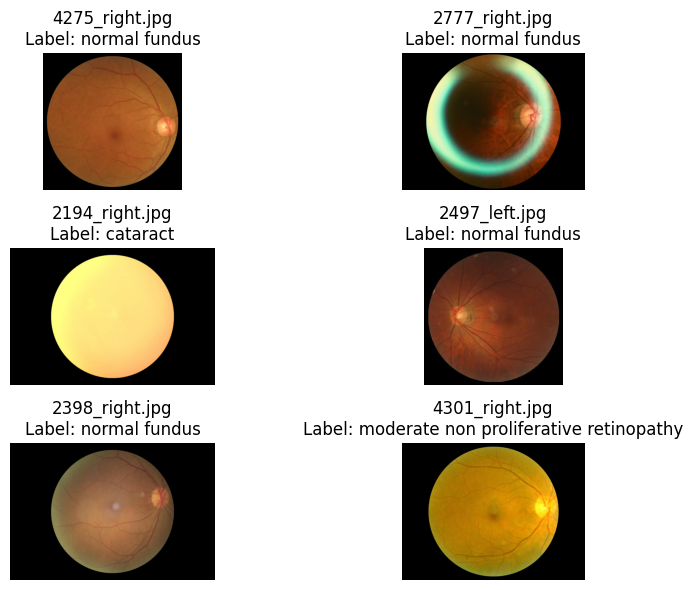

In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import random
import cv2

# Load the Excel file
my_sheet = 'Sheet1'
file_name = '/content/odir-5k/ODIR-5K/ODIR-5K/data.xlsx'
df = pd.read_excel(file_name, sheet_name=my_sheet)

# Image path columns
left_fundus_column = 'Left-Fundus'
right_fundus_column = 'Right-Fundus'

left_fundus_label = 'Left-Diagnostic Keywords'
right_fundus_label = 'Right-Diagnostic Keywords'

# Get image names and labels
left_image_names = df[left_fundus_column]
right_image_names = df[right_fundus_column]

left_labels = df[left_fundus_label]
right_labels = df[right_fundus_label]

# Create dictionaries for quick label lookup
left_labels_dict = dict(zip(left_image_names, left_labels))
right_labels_dict = dict(zip(right_image_names, right_labels))

# Home directory with image files
data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

# Testing ve Training directories
testing_dir = os.path.join(data_dir, 'Testing Images')
training_dir = os.path.join(data_dir, 'Training Images')

# Combine left and right image paths for random selection
combined_paths = pd.concat([left_image_names, right_image_names])
combined_labels = pd.concat([left_labels, right_labels])  # Duplicate labels

# Create a function to determine the correct label
def get_label(image_path):
    if 'left' in image_path.lower():
        return left_labels_dict.get(image_path, 'Unknown')
    elif 'right' in image_path.lower():
        return right_labels_dict.get(image_path, 'Unknown')
    return 'Unknown'

# Randomly select 6 images
random_indices = random.sample(range(len(combined_paths)), 6)
random_images = combined_paths.iloc[random_indices]
random_labels = [get_label(img) for img in random_images]

# Upload and visualize images
fig, axes = plt.subplots(3, 2, figsize=(9, 6))
axes = axes.flatten()

for ax, image_path, label in zip(axes, random_images, random_labels):
    full_image_path_1 = os.path.join(testing_dir, image_path)
    full_image_path_2 = os.path.join(training_dir, image_path)

    if os.path.exists(full_image_path_1):
        image = cv2.imread(full_image_path_1)
    elif os.path.exists(full_image_path_2):
        image = cv2.imread(full_image_path_2)
    else:
        image = None

    if image is not None:
        # BGR to RGB conversion
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax.imshow(image)
        ax.set_title(f"{image_path}\nLabel: {label}")
    else:
        ax.text(0.5, 0.5, 'Image not found', ha='center', va='center')

    ax.axis('off')

plt.tight_layout()
plt.show()

**Listing multiple diagnoses of the fundus**

In [15]:
leftEyeKeywords = df['Left-Diagnostic Keywords'].copy()
rightEyeKeywords = df['Right-Diagnostic Keywords'].copy()

In [16]:
leftEyeKeywords = leftEyeKeywords.str.split("，")
rightEyeKeywords = rightEyeKeywords.str.split("，")

In [17]:
leftEyeKeywords[2]

['laser spot', 'moderate non proliferative retinopathy']

**Converting multiple eye diagnostic tags to binary format and identifying unique keywords**

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

# We create an object to convert multiple labels to binary format using the MultiLabelBinarizer class.
mlb = MultiLabelBinarizer()

# We convert the right eye keywords (rightEyeKeywords) to binary format.
# This creates a column for each keyword and places a value of 0 or 1 indicating whether that diagnosis exists or not.
rightEyeDataFrame = pd.DataFrame(mlb.fit_transform(rightEyeKeywords),
                   columns=mlb.classes_,  # We set the column names as unique keywords.
                   index=rightEyeKeywords.index)  # We keep the original row indexes.

# We convert all unique diagnostic keywords (column names) for the right eye into a list.
allDiagnosisRight = rightEyeDataFrame.columns.to_list()

# We get the number of unique diagnostic keywords for the right eye.
len(allDiagnosisRight)

# We do the same for the left eye keywords (leftEyeKeywords).
lefttEyeDataFrame = pd.DataFrame(mlb.fit_transform(leftEyeKeywords),
                   columns=mlb.classes_,  # We set the column names as unique keywords.
                   index=leftEyeKeywords.index)  # We keep the original row indexes.

# We convert all unique diagnostic keywords (column names) for the left eye into a list.
allDiagnosisLeft = lefttEyeDataFrame.columns.to_list()

# We get the number of unique diagnostic keywords for the left eye.
len(allDiagnosisLeft)

# We combine all the unique diagnostic keywords for the right and left eye and select the unique ones.
# This process allows us to get all the different keywords in both eyes.
allDiagnosis = list(set(allDiagnosisLeft + allDiagnosisRight))

print(f"There are '{len(allDiagnosis)}' different diagnostic keywords.")

There are '105' different diagnostic keywords.


**Distribution of multiple eye diagnostic labels**

In [19]:
test_df = df.copy()  # We create a copy of the data frame (df) so that the original data remains unchanged.
doubleDiagnosisRow = []  # We create a list to store the indexes of rows with more than one diagnosis.

def getKeyDiagnosisSingle(columnName):
    keyDiagnosis = []  # This list will store unique keywords for each diagnosis.
    global doubleDiagnosisRow  # We define it as a global variable to track rows with double diagnosis.
    store = True  # Flag that determines whether to store the keywords of a row.

    # Loop for each row in test_df.
    for row in range(len(test_df[columnName])):
        store = True  # For each row, we set the flag to true at the start.

        # If a particular diagnosis (columnName) in this row is '1', i.e., if this diagnosis exists:
        if test_df[columnName][row] == 1:

            # We check each of the other diagnoses in that row.
            for lable in test_df.columns[7:]:  # We loop over the diagnostic columns (starting from column 7).
                if lable == columnName:
                    continue  # Skip to avoid checking the same column.

                # If there is another diagnosis in the same row (i.e., double diagnosis):
                if test_df[lable][row] == 1:
                    doubleDiagnosisRow.append(row)  # We add the index of this row to the double diagnosis list.
                    store = False  # We do not store the keywords of this row.
                    break  # Exit since another diagnosis is already found.

            # If there is only a single diagnosis in the row:
            if store == True:
                for i in rightEyeKeywords[row]:  # We add the right eye keywords.
                    keyDiagnosis.append(i)
                for i in leftEyeKeywords[row]:  # We add the left eye keywords.
                    keyDiagnosis.append(i)

    # We use the set function to obtain unique keywords for each diagnosis.
    keyDiagnosis = list(set(keyDiagnosis))
    return keyDiagnosis  # We return the unique keywords for this diagnosis.

# We call the function to extract unique keywords for each diagnosis.
keyNormal = getKeyDiagnosisSingle(test_df.columns[7])
keyDiabetes = getKeyDiagnosisSingle(test_df.columns[8])
keyGlaucoma = getKeyDiagnosisSingle(test_df.columns[9])
keyCataract = getKeyDiagnosisSingle(test_df.columns[10])
keyAMD = getKeyDiagnosisSingle(test_df.columns[11])
keyHypertension = getKeyDiagnosisSingle(test_df.columns[12])
keyMyopia = getKeyDiagnosisSingle(test_df.columns[13])
keyOtherDisease = getKeyDiagnosisSingle(test_df.columns[14])

# We define diagnosis labels and their corresponding keywords.
labelString = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia', 'Abnormalities']
allKeys = [keyNormal, keyDiabetes, keyGlaucoma, keyCataract, keyAMD, keyHypertension, keyMyopia, keyOtherDisease]

# We print the number of unique keywords for each diagnosis.
for i in range(8):
    print(labelString[i], len(allKeys[i]))

# For example, we can view the unique keywords for the 'Normal' diagnosis.
keyNormal

Normal 3
Diabetes 10
Glaucoma 5
Cataract 3
AMD 3
Hypertension 1
Myopia 6
Abnormalities 57


['low image quality', 'lens dust', 'normal fundus']

**Intersection and disjunction in lists**<br>
This is done to ensure a clear distinction between diseases and to identify the specific keywords for each disease (similar to confusion matrix).

In [20]:
# First section: Normal intersection operations
print("Intersect by normal :")

# Update each item in the allKeys list (except for index 0)
# Remove all elements from allKeys[i] that are in allKeys[0]
for i in range(1, len(allKeys)):
    allKeys[i] = list(set(allKeys[i]) - set(allKeys[0]))

# Print the length of each updated item
for i in range(8):
    print(labelString[i], len(allKeys[i]))

# Second section: Other intersection operations
print("\nIntersect by other :")

# Update each item in the allKeys list by checking all combinations
# Remove elements from each allKeys[i] set that are in any other allKeys[j] sets
for i in range(len(allKeys)):
    for j in range(i, len(allKeys)):
        if i == j:
            continue  # Skip if it is the same set
        else:
            allKeys[i] = list(set(allKeys[i]) - set(allKeys[j]))

# Print the length of each updated item again
for i in range(8):
    print(labelString[i], len(allKeys[i]))

Intersect by normal :
Normal 3
Diabetes 8
Glaucoma 3
Cataract 1
AMD 2
Hypertension 1
Myopia 4
Abnormalities 54

Intersect by other :
Normal 3
Diabetes 7
Glaucoma 3
Cataract 1
AMD 2
Hypertension 1
Myopia 4
Abnormalities 54


**Creating a unique list by combining all keywords**<br>
The purpose of this part is to combine the elements of all the lists in the allKeys list into a single list and remove duplicate elements from this list.

In [21]:
def getAllRecognizedKey(allKeys):
    allUniqueKeywords = set()  # Benzersiz anahtar kelimeleri tutmak için bir set kullanılır
    for keyList in allKeys:
        allUniqueKeywords.update(keyList)  # Set'in update fonksiyonu, yeni öğeleri benzersiz olarak ekler
    return list(allUniqueKeywords)  # Sonuç olarak set'i listeye dönüştürür

**Assigning separate keyword lists for different eye diseases and calculating the total number by combining unique keywords from all these lists**

In [22]:
# Create an empty list to store the keyword lists
keyAll = []

keyAll.append(keyNormal)
keyAll.append(keyDiabetes)
keyAll.append(keyGlaucoma)
keyAll.append(keyCataract)
keyAll.append(keyAMD)
keyAll.append(keyHypertension)
keyAll.append(keyMyopia)
keyAll.append(keyOtherDisease)

#In this part, the items in the keyAll list are reassigned to keyNormal, keyDiabetes, etc.
keyNormal, keyDiabetes, keyGlaucoma, keyCataract, keyAMD, keyHypertension, keyMyopia, keyOtherDisease = keyAll[0], keyAll[1], keyAll[2], keyAll[3], keyAll[4], keyAll[5], keyAll[6], keyAll[7]
#All identified keywords are combined and their total number is calculated
allkeyDiagnosis = getAllRecognizedKey(keyAll)
len(allkeyDiagnosis)

75

**Keyword mismatch detection**

In [23]:
# Creating a list of keywords not found at the beginning
unmatched_keywords = []

# Control of left eye keywords
for diagnosis in doubleDiagnosisRow:
    for keyword in leftEyeKeywords[diagnosis]:
        # Check if the keyword is in all key lists
        if not any(keyword in key for key in keyAll):
            unmatched_keywords.append(keyword)

# Control of right eye keywords
for diagnosis in doubleDiagnosisRow:
    for keyword in rightEyeKeywords[diagnosis]:
        # Check if the keyword is in all key lists
        if not any(keyword in key for key in keyAll):
            unmatched_keywords.append(keyword)

# Remove repeated keywords
unmatched_keywords = list(set(unmatched_keywords))

# Print results
print("Unmatched diagnosis keys:", len(unmatched_keywords))

Unmatched diagnosis keys: 30


**Identify rows with more than one diagnosis and calculate counts**

In [24]:
doubleDiagnosisRow = list(set(doubleDiagnosisRow))
print(f"There are '{len(doubleDiagnosisRow)}' lines with multiple diagnoses")
doubleDiagnosisRow.sort() # Sorting the list from smallest to largest

There are '586' lines with multiple diagnoses


**Analyzing the relationship between tags**<br>
This part can identify which diseases occur together (common labels), which diseases are independent of each other (different labels) and which diseases should be included in a new category (unrecognized labels).

In [25]:
def intersectFromMultiLabel(allKeys):
    notRecognizedList = []
    allUniqueKeywords = []

    for i in range(len(allKeys)):
        allKeys[i] = list(set(allKeys[i]))
        allUniqueKeywords = allUniqueKeywords + list(set(allKeys[i]))

    for row in doubleDiagnosisRow:
        tempList = []
        listedList = []
        colIndex = []
        ind = []

        for ilist in leftEyeKeywords[row]:
            if ilist not in allUniqueKeywords:
                tempList.append(ilist)
        for ilist in rightEyeKeywords[row]:
            if ilist not in allUniqueKeywords:
                tempList.append(ilist)

        for i in range(7, len(test_df.columns)):
            if test_df[test_df.columns[i]][row] == 1:
                colIndex.append(i - 7)

        tempList = list(set(tempList))
        isContainAbnormal = 7 in colIndex

        if len(tempList) > 0:
            ind = colIndex
            for ilist in leftEyeKeywords[row]:
                if ilist not in tempList:
                    listedList.append(ilist)
            for ilist in rightEyeKeywords[row]:
                if ilist not in tempList:
                    listedList.append(ilist)

            for ilist in listedList:
                for i in colIndex:
                    if ilist in keyNormal:
                        continue
                    if ilist in allKeys[i]:
                        ind.remove(i)

            if len(ind) == 0 and isContainAbnormal:
                ind.append(7)
            if len(ind) == 1 and len(tempList) == 1:
                allKeys[ind[0]] = allKeys[ind[0]] + tempList
                allKeys[ind[0]] = list(set(allKeys[ind[0]]))
            else:
                print("not recognize")
                notRecognizedList.append(tempList[0])
                notRecognizedList = list(set(notRecognizedList))

        allUniqueKeywords = []
        for i in allKeys:
            allUniqueKeywords = allUniqueKeywords + list(set(i))

    return allKeys, notRecognizedList

**Iterative keyword optimization**<br>
The goal is to reach a steady state in the keyword clusters and in the process identify unrecognized keywords.

In [26]:
itterate = True
notRecognizedList = []
while itterate :
  temp_allkeyDiagnosis = allkeyDiagnosis.copy()
  keyAll, notRecognizedList = intersectFromMultiLabel(keyAll)
  allkeyDiagnosis = getAllRecognizedKey(keyAll)

  print(notRecognizedList)
  if len(temp_allkeyDiagnosis) == len(allkeyDiagnosis):
    print(True)
    itterate = False

not recognize
not recognize
not recognize
['suspected cataract', 'image offset', 'myopia retinopathy']
not recognize
not recognize
['suspected cataract', 'image offset']
not recognize
not recognize
['suspected cataract', 'image offset']
True


**Summary of keyword analysis**

In [27]:
allkeyDiagnosis = getAllRecognizedKey(keyAll)

keyNormal, keyDiabetes, keyGlaucoma, keyCataract, keyAMD, keyHypertension, keyMyopia, keyOtherDisease = keyAll[0], keyAll[1], keyAll[2], keyAll[3], keyAll[4], keyAll[5], keyAll[6], keyAll[7]

for i in range(8):
  print(labelString[i], len(keyAll[i]))

print("\nall regnized key :",len(allkeyDiagnosis))
print("\nnot recognized key : ", list(set(allDiagnosis)-set(allkeyDiagnosis)))

Normal 3
Diabetes 14
Glaucoma 5
Cataract 3
AMD 4
Hypertension 1
Myopia 7
Abnormalities 79

all regnized key : 103

not recognized key :  ['suspected cataract', 'image offset']


Now, we check if the unrecognized keys 'image offset', 'suspected cataract' are in 'notRecognizedList' and 'allkeyDiagnosis'. If it exists, we add the string to a specific index of the keyAll list and remove it from the notRecognizedList.

In [28]:
string1 = 'image offset'
string2 = 'suspected cataract'

if string1 in notRecognizedList and string1 not in allkeyDiagnosis:
  keyAll[4].append(string1)
  notRecognizedList.remove(string1)

if string2 in notRecognizedList and string1 not in allkeyDiagnosis:
  print(True)
  keyAll[3].append(string2)
  notRecognizedList.remove(string2)

True


In [29]:
keyAll[0]

['low image quality', 'normal fundus', 'lens dust']

In [30]:
keyAll[2]

['optic disk photographically invisible',
 'suspected glaucoma',
 'normal fundus',
 'lens dust',
 'glaucoma']

In [31]:
keyAll[3]

['cataract', 'normal fundus', 'lens dust', 'suspected cataract']

In [32]:
keyAll[4]

['wet age-related macular degeneration',
 'dry age-related macular degeneration',
 'age-related macular degeneration',
 'normal fundus',
 'image offset']

In [33]:
allkeyDiagnosis = getAllRecognizedKey(keyAll)

keyNormal, keyDiabetes, keyGlaucoma, keyCataract, keyAMD, keyHypertension, keyMyopia, keyOtherDisease = keyAll[0], keyAll[1], keyAll[2], keyAll[3], keyAll[4], keyAll[5], keyAll[6], keyAll[7]

for i in range(8):
  print(labelString[i], len(keyAll[i]))

print("\nall regnized key :",len(allkeyDiagnosis))
print("\nnot recognized key : ", list(set(allDiagnosis)-set(allkeyDiagnosis)))

Normal 3
Diabetes 14
Glaucoma 5
Cataract 4
AMD 5
Hypertension 1
Myopia 7
Abnormalities 79

all regnized key : 105

not recognized key :  []


Unrecognized diagnosis check

In [34]:
string = 'central serous chorioretinopathy'

for i in notRecognizedList:
  if i not in allkeyDiagnosis:
    print("not in : ", i)

string in keyOtherDisease

True

**CREATING VALIDATION SET**

In [35]:
import os
import shutil # to copy, move and delete files and directories
import random

data=dir = '/content/odir-5k/ODIR-5K/ODIR-5K'
training_dir = os.path.join(data_dir, 'Training Images')
validation_dir = os.path.join(data_dir, 'Validation Images')

# to read all image files in the 'Training Images'
all_images = os.listdir(training_dir)

# to create 'Validation Images'
os.makedirs(validation_dir, exist_ok=True)

# Split training and validation sets (e.g. 20% validation set)
validation_split = 0.2
num_validation = int(len(all_images) * validation_split)
validation_images = random.sample(all_images, num_validation)

# Moving validation images
for image in validation_images:
    src_path = os.path.join(training_dir, image)
    dst_path = os.path.join(validation_dir, image)
    if os.path.exists(src_path):
        shutil.move(src_path, dst_path)
    else:
        print(f"Image not found: {src_path}")

print("Validation set created successfully.")


Validation set created successfully.


**How many images in 'Validation Images' set?**

In [36]:
import os
from PIL import Image

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Validation Images'
print(f"Number of images in the Validation folder: {count_images_in_directory(data_dir)}")

Number of images in the Validation folder: 1400


**Checking the number of images in sets**

In [37]:
import os
from PIL import Image

data_dir = '/content/odir-5k/ODIR-5K/ODIR-5K'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

testing_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images'
print(f"Number of images in the Testing folder: {count_images_in_directory(testing_dir)}")
training_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Training Images'
print(f"Number of images in the Training folder: {count_images_in_directory(training_dir)}")
validation_dir = '/content/odir-5k/ODIR-5K/ODIR-5K/Validation Images'
print(f"Number of images in the Validation folder: {count_images_in_directory(validation_dir)}")

Number of images in the Testing folder: 1000
Number of images in the Training folder: 5600
Number of images in the Validation folder: 1400


**IMAGE PREPROCESSING**

**Resizing the images**

In [38]:
import tensorflow as tf

# define croping function with tensorflow resize
def crop_image(image_path):
  image_data = tf.keras.preprocessing.image.load_img(image_path)

  array = tf.keras.preprocessing.image.img_to_array(image_data)
  image = tf.image.resize(
                        array, [200,200],
                        method='bilinear',
                        preserve_aspect_ratio=True,
                        antialias=False,
                        )
  image = image / 255.0 # normalization
  return image

**Converting to square format**

In [39]:
import cv2

# Function to resize and center crop the image
def image_resize(image_path, dim):
    # Reading the image
    img = cv2.imread(image_path)

    # Convert to square format if image sizes are different
    if img.shape[1] != img.shape[0]:
        x = img.shape[1] // 2
        y = img.shape[0] // 2
        x = x - y
        # Crop the image to the center frame
        img = img[0:0+img.shape[0], x:x+img.shape[0]]

    # Resize image to specified dimensions
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

(1, 150, 200, 3)

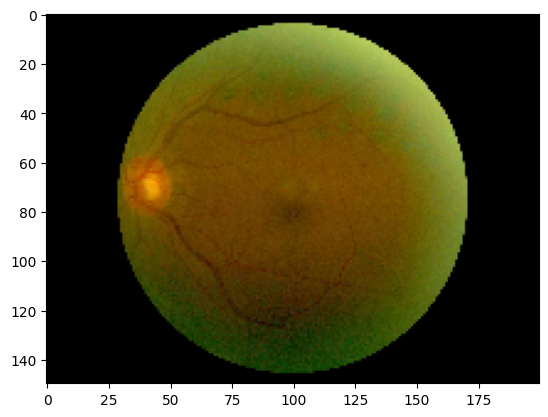

In [40]:
import numpy as np
#before CLAHE processing
source = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images/1000_left.jpg'
test = crop_image(source)
test = np.array(test)
img = tf.keras.preprocessing.image.array_to_img(test)
plt.imshow(img)
test = np.expand_dims(test, axis=0)
test.shape

**Histogram Equalization**<br>
CLAHE (Contrast Limited Adaptive Histogram Equalization):<br>
This method divides the image into regions and applies a separate histogram equalization for each region. This allows correcting brightness variations in one region without affecting other regions.

In [41]:
# Function to implement CLAHE (Contrast Limited Adaptive Histogram Equalization)
def CLAHE(image_path, dim, clipLimit, tileGridSize):
    # Resizing the image first
    img = image_resize(image_path, dim)

    # Create CLAHE object, set limit and grid size
    clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)

    # Converting an image from BGR to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Separating three channels in LAB color space
    l, a, b = cv2.split(lab)

    # CLAHE'yi L-kanalına uygula
    l2 = clahe.apply(l)

    # Kanalları yeniden birleştir
    lab = cv2.merge((l2, a, b))

    # LAB'den BGR'ye geri dönüştür
    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # BGR'den RGB'ye dönüştür
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # İşlenmiş görüntüyü döndür
    return img

(1, 200, 200, 3)

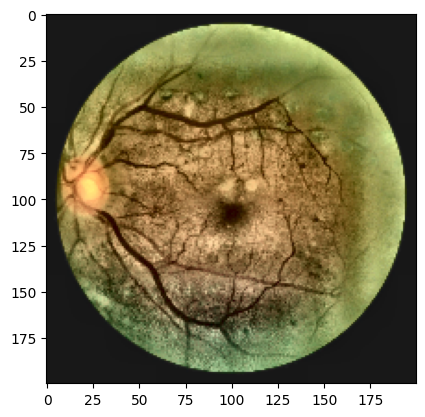

In [42]:
#showing CLAHE image Preprocessing
source = '/content/odir-5k/ODIR-5K/ODIR-5K/Testing Images/1000_left.jpg'
test = CLAHE(source, (200,200), 20, (10,10))
test = np.array(test)
img = tf.keras.preprocessing.image.array_to_img(test)
plt.imshow(img)
test = test.reshape(1, 200, 200, 3)
test.shape

In [43]:
#set target size image

target_size = (230, 230)
# color_mode = 'grayscale'
color_mode = 'rgb'
if color_mode == 'grayscale':
  shapeadd = (1,)
if color_mode == 'rgb':
  shapeadd = (3,)

In [44]:
#function for generate label to single image

#return index in key of all diagnosis list
def getIndexLabel(key, mKeyAll):
  # print(key)
  for ilist in mKeyAll:
    if key in ilist:
      # print(mKeyAll.index(ilist))
      return mKeyAll.index(ilist)

#return multilabel by index
def getMultiLabelFromKeys(indexLabel):
  temp_label = []
  for i in range(8):
    if i in indexLabel:
      temp_label.append(1)
    else :
      temp_label.append(0)
  return temp_label
  # print(right_label)